# Tutorial: Global Ocean with Biogeochemistry

In [1]:
import numpy as np
from MITgcmutils import mds
import matplotlib.pyplot as plt
directory = '../tutorial_global_oce_biogeo'

x = mds.rdmds(directory+'/run/XC*')
y = mds.rdmds(directory+'/run/YC*')
z = mds.rdmds(directory+'/run/RC')[:,0,0]

n_depths = 15
n_rows = 64
n_cols = 128
n_ob_timesteps = 4

min_col = 50
max_col = 55
min_row = 40
max_row = 45


## Visualize the Domain and Masks

Text(0.5, 1.0, 'Surface Mask')

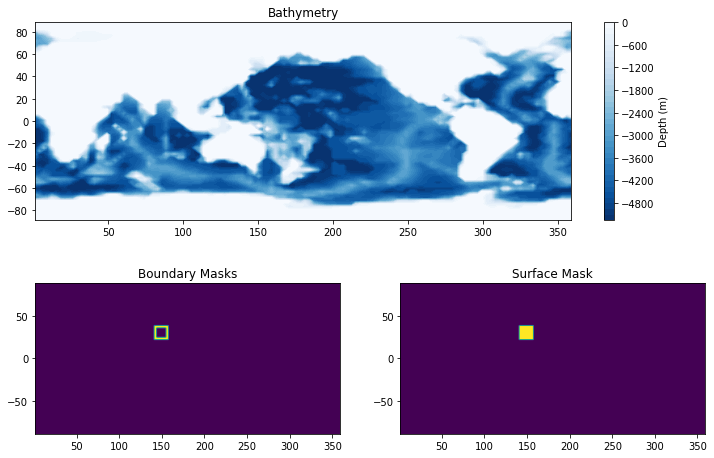

In [2]:
bathymetry = np.fromfile(directory+'/input/bathy.bin', dtype='>f4')
bathymetry = np.reshape(bathymetry,(n_rows,n_cols))

fig = plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
C = plt.contourf(x,y,bathymetry,50,cmap='Blues_r')
cbar = plt.colorbar(C)
cbar.set_label('Depth (m)', rotation=90)
plt.title('Bathymetry')

plt.subplot(2,2,3)
all_boundary_masks = np.zeros_like(bathymetry)
for mask_name in ['lateral_mask_east','lateral_mask_west','lateral_mask_north','lateral_mask_south']:
    mask = np.fromfile(directory+'/input/'+mask_name+'.bin', dtype='>f4')
    mask = np.reshape(mask,(n_rows,n_cols))
    all_boundary_masks[mask>0]=1
#all_boundary_masks = np.ma.masked_where(mask == 0, mask)
plt.imshow(all_boundary_masks,extent=[np.min(x),np.max(x),np.min(y),np.max(y)],origin='lower')
plt.title('Boundary Masks')


plt.subplot(2,2,4)
mask_name = 'surface_mask'
mask = np.fromfile(directory+'/input/'+mask_name+'.bin', dtype='>f4')
mask = np.reshape(mask,(n_rows,n_cols))
mask[mask>0]=1
#mask = np.ma.masked_where(mask == 0, mask)
plt.imshow(mask,extent=[np.min(x),np.max(x),np.min(y),np.max(y)],origin='lower')
plt.title('Surface Mask')

## Compare output on boundaries

Text(0.5, 0.98, 'Standard Output vs. Diagnostics_ob Output Comparison')

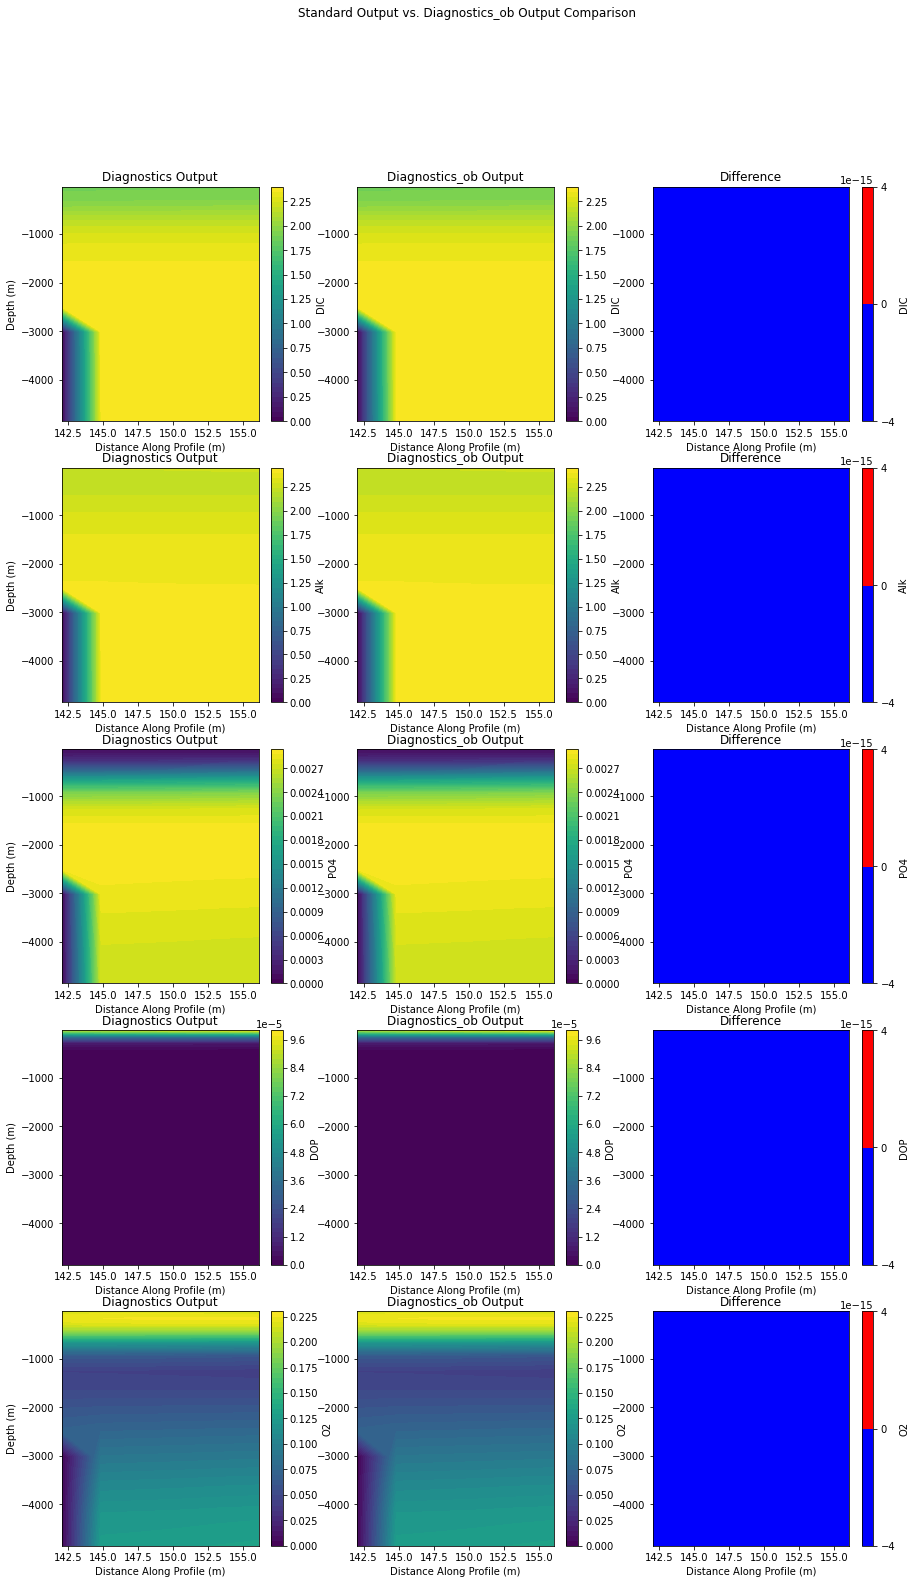

In [33]:
time_step = 5184004

n_tracers = 5
tracer_names={1:'DIC',2:'Alk',3:'PO4',4:'DOP',5:'O2'}
fig=plt.figure(figsize=(15,5*n_tracers))

counter = 1
for tracer in range(1,n_tracers+1):

    diag_output = mds.rdmds(directory+'/run/PTRACER0'+str(tracer)+'.0005184004.*')

    diag_ob_output = np.fromfile(directory+'/run/MASK_OB_01_PTRACE0'+str(tracer)+'.bin',dtype='>f4')
    diag_ob_output = np.reshape(diag_ob_output,(n_ob_timesteps,n_depths,max_col-min_col+1))

    

    # plot southern boundary first
    plt.subplot(n_tracers,3,counter)
    C = plt.contourf(x[min_row,min_col:max_col+1],z,diag_output[:,min_row,min_col:max_col+1],50)
    cbar = plt.colorbar(C)
    cbar.set_label(tracer_names[tracer])
    plt.ylabel('Depth (m)')
    plt.xlabel('Distance Along Profile (m)')
    plt.title('Diagnostics Output')
    counter+=1

    plt.subplot(n_tracers,3,counter)
    C2 = plt.contourf(x[min_row,min_col:max_col+1],z,diag_ob_output[-1,:,:],50)
    cbar = plt.colorbar(C2)
    cbar.set_label(tracer_names[tracer])
    plt.xlabel('Distance Along Profile (m)')
    plt.title('Diagnostics_ob Output')
    counter+=1

    plt.subplot(n_tracers,3,counter)
    C3 = plt.contourf(x[min_row,min_col:max_col+1],z,diag_output[:,min_row,min_col:max_col+1]
                      -diag_ob_output[-1,:,:],50,cmap='seismic')
    cbar = plt.colorbar(C3)
    cbar.set_label(tracer_names[tracer])
    plt.xlabel('Distance Along Profile (m)')
    plt.title('Difference')
    counter+=1

plt.suptitle('Standard Output vs. Diagnostics_ob Output Comparison')